# Goals of this Project

This project seeks to answer the following questions regarding video game data:
1. From whom were the most games published?
2. What are the best-rated games?
3. What are the best-selling games?
4. Are ratings and sales correlated with publisher?
5. Are ratings and sales correlated with genre?
6. Are ratings and sales correlated with time?

# Import Statements and Inputting the Dataset

In [1]:
import sys
sys.path.append("/content/drive/MyDrive/Personal")
import openpyxl
import game_analysis_methods as gam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("/content/drive/MyDrive/Personal/Video Game Dataset.xlsx")
df = df.astype({"Developer": str, "Name": str, "Genre": str, "Publisher": str, "Rating": str})
manip = gam.DataFrame_Manipulator(df)

In [2]:
print(df)

                            Name  Year_of_Release         Genre  \
0        .hack//Infection Part 1             2002  Role-Playing   
1         .hack//Mutation Part 2             2002  Role-Playing   
2         .hack//Outbreak Part 3             2002  Role-Playing   
3                    [Prototype]             2009        Action   
4                    [Prototype]             2009        Action   
...                          ...              ...           ...   
6889                        Zubo             2008          Misc   
6890               Zumba Fitness             2010        Sports   
6891  Zumba Fitness: World Party             2013          Misc   
6892          Zumba Fitness Core             2012          Misc   
6893          Zumba Fitness Rush             2012        Sports   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                     Atari      0.49      0.38      0.26         0.13   
1                     Atari      0.23      0.18

# From whom were the most games published?

Because the dataset is far too large to show every single company, only the top ten will be shown. Electronic Arts released the most games at 945, followed by Ubisoft at 498 and Activision at 492.

In [3]:
print(manip.elements_per_group("Publisher", 10))

Publisher
Electronic Arts                 945
Ubisoft                         498
Activision                      492
Sony Computer Entertainment     316
THQ                             307
Nintendo                        293
Sega                            287
Take-Two Interactive            273
Konami Digital Entertainment    246
Namco Bandai Games              244
Name: Publisher, dtype: int64


# What are the best rated games?

The best-rated game of all time is *Harvest Moon: Friends of Mineral Town*.

In [4]:
top_rated_df = manip.top_bottom_n("User_Score", "top", 10)
print(top_rated_df["User_Score"])

Name
Harvest Moon: Friends of Mineral Town    9.6
Boktai: The Sun is in Your Hand          9.6
MLB SlugFest Loaded                      9.5
Golden Sun: The Lost Age                 9.5
Karnaaj Rally                            9.5
Wade Hixton's Counter Punch              9.5
Shenmue                                  9.4
Skies of Arcadia                         9.4
Metal Gear Solid                         9.4
Monster Rancher Advance 2                9.4
Name: User_Score, dtype: float64


Here's some more information about the games:

In [5]:
print(top_rated_df)

                                       Year_of_Release         Genre  \
Name                                                                   
Harvest Moon: Friends of Mineral Town             2003    Simulation   
Boktai: The Sun is in Your Hand                   2003  Role-Playing   
MLB SlugFest Loaded                               2004        Sports   
Golden Sun: The Lost Age                          2002  Role-Playing   
Karnaaj Rally                                     2003        Racing   
Wade Hixton's Counter Punch                       2004        Sports   
Shenmue                                           1999     Adventure   
Skies of Arcadia                                  2000  Role-Playing   
Metal Gear Solid                                  1998        Action   
Monster Rancher Advance 2                         2002    Simulation   

                                                          Publisher  NA_Sales  \
Name                                                  

# What are the best selling games?

### Worldwide

The best-selling game worldwide is *Wii Sports*.

In [6]:
top_selling_df = manip.top_bottom_n("Global_Sales", "top", 10)
print(top_selling_df["Global_Sales"])

Name
Wii Sports                   82.53
Mario Kart Wii               35.52
Wii Sports Resort            32.77
New Super Mario Bros.        29.80
Wii Play                     28.92
New Super Mario Bros. Wii    28.32
Mario Kart DS                23.21
Wii Fit                      22.70
Kinect Adventures!           21.81
Wii Fit Plus                 21.79
Name: Global_Sales, dtype: float64


Here's some more information about it:

In [7]:
indexed_df = manip.df.set_index("Name")
print(indexed_df.loc["Wii Sports"])

Year_of_Release        2006
Genre                Sports
Publisher          Nintendo
NA_Sales              41.36
EU_Sales              28.96
JP_Sales               3.77
Other_Sales            8.45
Global_Sales          82.53
Critic_Score             76
Critic_Count             51
User_Score              8.0
User_Count              322
Developer          Nintendo
Rating                    E
Name: Wii Sports, dtype: object


Interestingly, nine of the ten best-selling games globally were developed by Nintendo.

In [8]:
print(top_selling_df["Publisher"])

Name
Wii Sports                                 Nintendo
Mario Kart Wii                             Nintendo
Wii Sports Resort                          Nintendo
New Super Mario Bros.                      Nintendo
Wii Play                                   Nintendo
New Super Mario Bros. Wii                  Nintendo
Mario Kart DS                              Nintendo
Wii Fit                                    Nintendo
Kinect Adventures!           Microsoft Game Studios
Wii Fit Plus                               Nintendo
Name: Publisher, dtype: object


North American and European best-selling games are similar.

In [9]:
NA_top_selling = manip.top_bottom_n("NA_Sales", "top", 10)
print(NA_top_selling[["NA_Sales", "Publisher"]])

                           NA_Sales               Publisher
Name                                                       
Wii Sports                    41.36                Nintendo
Mario Kart Wii                15.68                Nintendo
Wii Sports Resort             15.61                Nintendo
Kinect Adventures!            15.00  Microsoft Game Studios
New Super Mario Bros. Wii     14.44                Nintendo
Wii Play                      13.96                Nintendo
New Super Mario Bros.         11.28                Nintendo
Mario Kart DS                  9.71                Nintendo
Call of Duty: Black Ops        9.70              Activision
Grand Theft Auto V             9.66    Take-Two Interactive


In [10]:
EU_top_selling = manip.top_bottom_n("EU_Sales", "top", 10)
print(EU_top_selling[["EU_Sales", "Publisher"]])

                                              EU_Sales             Publisher
Name                                                                        
Wii Sports                                       28.96              Nintendo
Mario Kart Wii                                   12.76              Nintendo
Wii Sports Resort                                10.93              Nintendo
Brain Age: Train Your Brain in Minutes a Day      9.20              Nintendo
Wii Play                                          9.18              Nintendo
New Super Mario Bros.                             9.14              Nintendo
Grand Theft Auto V                                9.09  Take-Two Interactive
Wii Fit Plus                                      8.49              Nintendo
Wii Fit                                           8.03              Nintendo
Mario Kart DS                                     7.47              Nintendo


# Are ratings, sales, and user count correlated with publisher?

Because the dataset is far too large to show everything, a random sample of 15 rows will be taken to obtain each row's publisher.

### Ratings and Sales

Ratings do seem to be based on the publisher, at least somewhat. Sales also correlate with the publisher. On the other hand, sales seem to be less correlated with ratings.

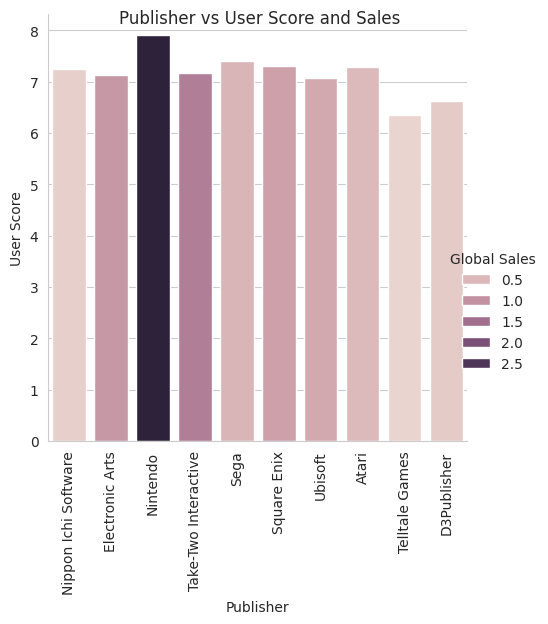

In [11]:
random_df = manip.df.sample(15)
random_publishers = random_df["Publisher"]
publisher_score_means = [df[df["Publisher"] == publisher]["User_Score"].mean() for publisher in random_publishers]
publisher_sales_means = [df[df["Publisher"] == publisher]["Global_Sales"].mean() for publisher in random_publishers]

sns.set_style("whitegrid")
g = sns.catplot(x=random_publishers, y=publisher_score_means, kind="bar", hue=publisher_sales_means, dodge=False)
g.fig.suptitle("Publisher vs User Score and Sales")
g.set_ylabels("User Score")
g.set_xticklabels(rotation=90)
g._legend.set_title("Global Sales")
plt.show()

### User Count

User count is highly dependant on the publisher, with some having hundreds of millions of users and others not even fifty million.

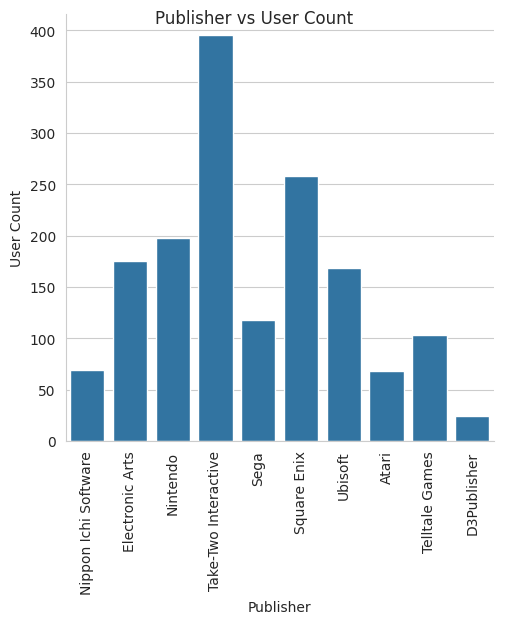

In [12]:
publisher_count_means = [df[df["Publisher"] == publisher]["User_Count"].mean() for publisher in random_publishers]

g = sns.catplot(x=random_publishers, y=publisher_count_means, kind="bar")
g.fig.suptitle("Publisher vs User Count")
g.set_ylabels("User Count")
g.set_xticklabels(rotation=90)
plt.show()

# Are ratings, sales, and user count correlated with genre?

### Ratings

Ratings seem to be based far less on genre, with all genres having similar scores.

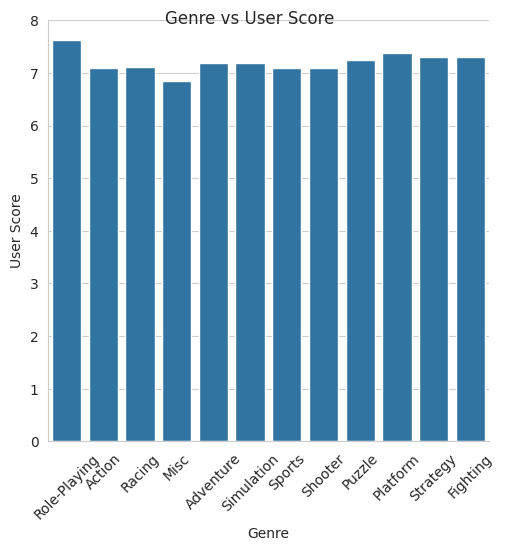

In [13]:
g = sns.catplot(x="Genre", y="User_Score", data=df, kind="bar", errorbar=('ci', False))
g.fig.suptitle("Genre vs User Score")
g.set_ylabels("User Score")
g.set_xticklabels(rotation=45)
plt.show()

### Sales

On the other hand, global sales are correlated with ratings, with the best-selling genre on average (Misc) selling over four times more than the worst-selling (Strategy).

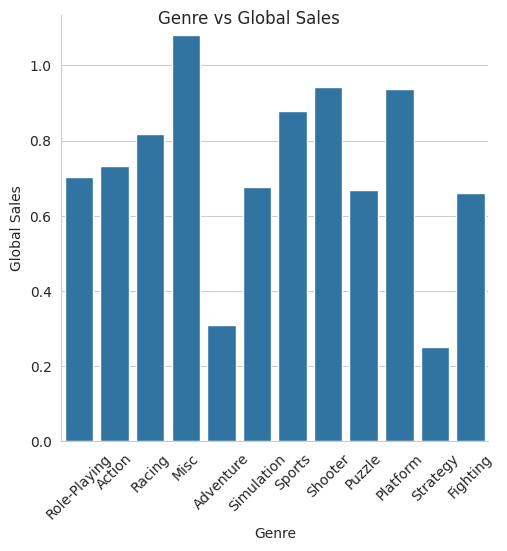

In [14]:
g = sns.catplot(x="Genre", y="Global_Sales", data=df, kind="bar", errorbar=('ci', False))
g.fig.suptitle("Genre vs Global Sales")
g.set_ylabels("Global Sales")
g.set_xticklabels(rotation=45)
plt.show()

### User Count

Similarily, user count and genre are highly correlated, with Shooter games having the highest user count with almost 400 million and Misc not even 50 million.

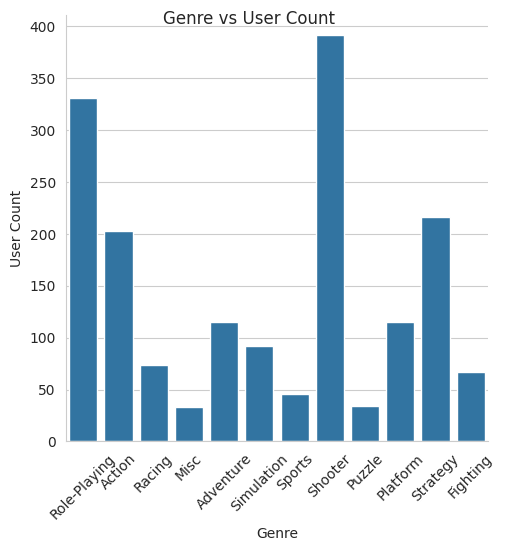

In [15]:
g = sns.catplot(x="Genre", y="User_Count", data=df, kind="bar", errorbar=('ci', False))
g.fig.suptitle("Genre vs User Count")
g.set_ylabels("User Count")
g.set_xticklabels(rotation=45)
plt.show()

# Are ratings, sales, and user count correlated with time?

Due to the lack of sufficient data before 1998, games from before then will not be included.

### Ratings

User ratings seem to have dropped from a high of around 8.50 on average in 1998 to around 6.75 in 2016.

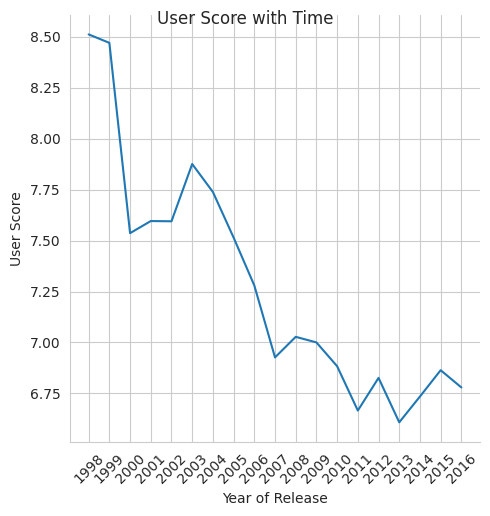

In [16]:
after_97_df = df[df["Year_of_Release"] > 1997]

g = sns.relplot(x="Year_of_Release", y="User_Score", data=after_97_df, kind="line", errorbar=None)
g.fig.suptitle("User Score with Time")
g.set_xlabels("Year of Release")
g.set_ylabels("User Score")
g.ax.set_xticks(np.arange(1998, 2017, 1))
g.set_xticklabels(rotation=45)
plt.show()

### Sales

Global Sales peaked in 2008 with almost 500 million, but then fell to around 100 million.

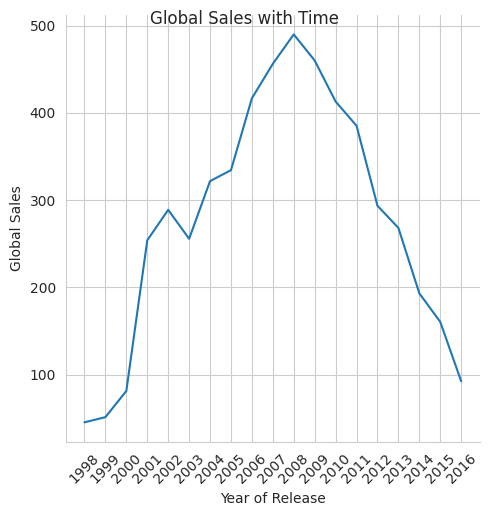

In [17]:
sales_sums = after_97_df.groupby("Year_of_Release")["Global_Sales"].sum()
g = sns.relplot(x=np.arange(1998, 2017, 1), y=sales_sums, kind="line")
g.fig.suptitle("Global Sales with Time")
g.set_xlabels("Year of Release")
g.set_ylabels("Global Sales")
g.ax.set_xticks(np.arange(1998, 2017, 1))
g.set_xticklabels(rotation=45)
plt.show()

### User Count

User Count rose dramatically until it peaked in 2011, afterwards falling.

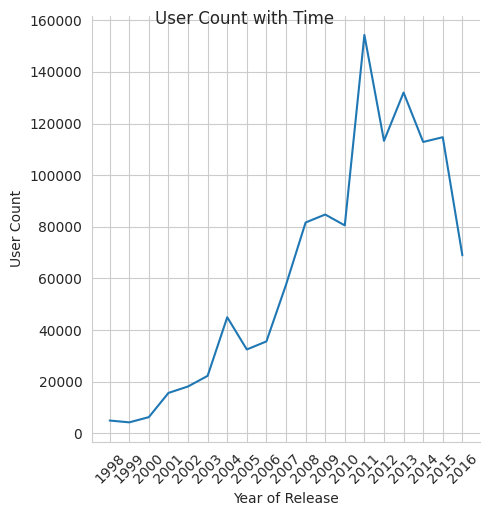

In [18]:
user_sums = after_97_df.groupby("Year_of_Release")["User_Count"].sum()
g = sns.relplot(x=np.arange(1998, 2017, 1), y=user_sums, kind="line")
g.fig.suptitle("User Count with Time")
g.set_xlabels("Year of Release")
g.set_ylabels("User Count")
g.ax.set_xticks(np.arange(1998, 2017, 1))
g.set_xticklabels(rotation=45)
plt.show()

# Acknowledgement of Rights

I do not claim the rights to any part of the data analyzed. All credit goes to the original authors: https://zenodo.org/records/2454579#.Y9Y2c9JBwUE.